In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# define a grid which will be assigned with values
grid = np.zeros((10,10))
grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [56]:
#  make a street in the grid by putting obstacles
start = (9, 0)
goal = (0, 9)
Moves = [(0, 1),(0, -1),(1, 0),(-1, 0)]

# streets
# 0 is the obstacles, 1 is the streets
grid[0,:] = 1  # row 10
grid[1:5,9] = 1  # Vertical line from 1 to row 6
grid[5,:] = 1   # Horizontal path in row 5
grid[6, 2:6] = 1 # Horizontal path in row 6
grid[7:9,4] = 1 # Vertical from 6 to row 10
grid[9,:] = 1 # row 10


grid


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

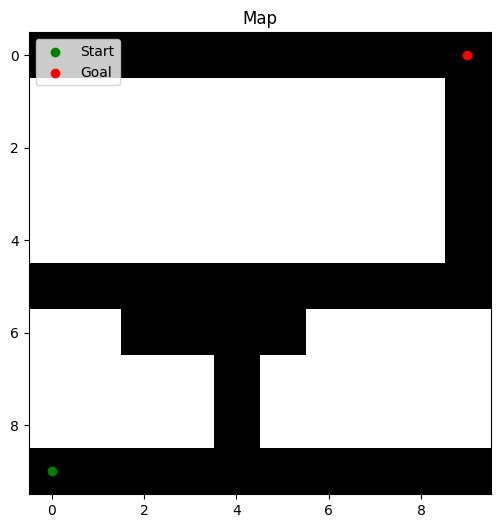

In [57]:
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="gray_r")  
plt.scatter(start[1], start[0], color="green", label="Start")  
plt.scatter(goal[1], goal[0], color="red", label="Goal")  
plt.legend()
plt.title("Map")
plt.show()

In [46]:
# make huristic value for each point from goal, i will use manhattan distance as we took 
def hurestic(x,y,g):
    return abs(x-g[0])+abs(y-g[1])
points_values = {}

for x in range(grid.shape[0]):
    for y in range(grid.shape[1]):
        points_values[(x, y)] = hurestic(x,y,goal)
print(points_values)

{(0, 0): 9, (0, 1): 8, (0, 2): 7, (0, 3): 6, (0, 4): 5, (0, 5): 4, (0, 6): 3, (0, 7): 2, (0, 8): 1, (0, 9): 0, (1, 0): 10, (1, 1): 9, (1, 2): 8, (1, 3): 7, (1, 4): 6, (1, 5): 5, (1, 6): 4, (1, 7): 3, (1, 8): 2, (1, 9): 1, (2, 0): 11, (2, 1): 10, (2, 2): 9, (2, 3): 8, (2, 4): 7, (2, 5): 6, (2, 6): 5, (2, 7): 4, (2, 8): 3, (2, 9): 2, (3, 0): 12, (3, 1): 11, (3, 2): 10, (3, 3): 9, (3, 4): 8, (3, 5): 7, (3, 6): 6, (3, 7): 5, (3, 8): 4, (3, 9): 3, (4, 0): 13, (4, 1): 12, (4, 2): 11, (4, 3): 10, (4, 4): 9, (4, 5): 8, (4, 6): 7, (4, 7): 6, (4, 8): 5, (4, 9): 4, (5, 0): 14, (5, 1): 13, (5, 2): 12, (5, 3): 11, (5, 4): 10, (5, 5): 9, (5, 6): 8, (5, 7): 7, (5, 8): 6, (5, 9): 5, (6, 0): 15, (6, 1): 14, (6, 2): 13, (6, 3): 12, (6, 4): 11, (6, 5): 10, (6, 6): 9, (6, 7): 8, (6, 8): 7, (6, 9): 6, (7, 0): 16, (7, 1): 15, (7, 2): 14, (7, 3): 13, (7, 4): 12, (7, 5): 11, (7, 6): 10, (7, 7): 9, (7, 8): 8, (7, 9): 7, (8, 0): 17, (8, 1): 16, (8, 2): 15, (8, 3): 14, (8, 4): 13, (8, 5): 12, (8, 6): 11, (8, 7):

In [ ]:
# use bfs on the grid to find the path, use huristic values as cost
def bfs(grid, start, goal):
    queue = [start]
    visited = set()
    parent = {}
    parent[start] = None
    while queue:
        current = queue.pop(0)
        if current == goal:
            break
        visited.add(current)
        for i, j in Moves:
            new_x, new_y = current[0] + i, current[1] + j
            if 0 <= new_x < grid.shape[0] and 0 <= new_y < grid.shape[1] and grid[new_x, new_y] == 1 and (new_x, new_y) not in visited:
                queue.append((new_x, new_y))
                visited.add((new_x, new_y))
                parent[(new_x, new_y)] = current
    path = []
    while current:
        path.append(current)
        current = parent[current]
    return path[::-1]

# test the function
path = bfs(grid,start,goal)

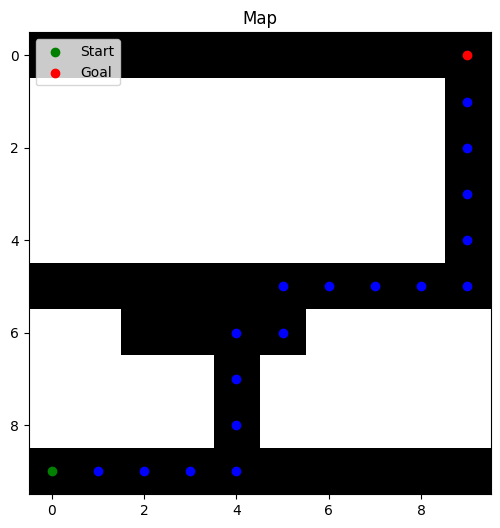

In [64]:
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="gray_r")  
plt.scatter(start[1], start[0], color="green", label="Start")  
plt.scatter(goal[1], goal[0], color="red", label="Goal")  
path = np.array(path)
for i in range(1,path.shape[0]-1):
    plt.scatter(path[i, 1], path[i, 0], color="blue")
plt.legend()
plt.title("Map")
plt.show()